In [1]:
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv("../dataset/example_retail_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      298 non-null    object 
 1   y       293 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [10]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [2]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [3]:
df.tail()

,ds,y
293,2016-05-02,NaN
294,2016-05-03,NaN
295,2016-05-04,NaN
296,2016-05-05,NaN
297,2016-05-11,NaN


In [4]:
future = m.make_future_dataframe(periods=5)

In [5]:
future.tail()

,ds
298,2016-05-12
299,2016-05-13
300,2016-05-14
301,2016-05-15
302,2016-05-16


In [15]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
293,2016-05-02,462968.575843,465271.930029,486177.172504,462968.575843,462968.575843,12857.258485,12857.258485,12857.258485,12857.258485,12857.258485,12857.258485,0.0,0.0,0.0,475825.834328
294,2016-05-03,463014.954058,466809.299468,486599.940851,463014.954058,463014.954058,13583.220999,13583.220999,13583.220999,13583.220999,13583.220999,13583.220999,0.0,0.0,0.0,476598.175057
295,2016-05-04,463061.332273,467116.533098,488159.034049,463061.332273,463061.332273,14560.578572,14560.578572,14560.578572,14560.578572,14560.578572,14560.578572,0.0,0.0,0.0,477621.910845
296,2016-05-05,463107.710488,469543.766890,489288.987353,463107.710488,463107.710488,15761.892705,15761.892705,15761.892705,15761.892705,15761.892705,15761.892705,0.0,0.0,0.0,478869.603193
297,2016-05-06,463154.088702,469273.811288,490557.493259,463154.088702,463154.088702,17151.294599,17151.294599,17151.294599,17151.294599,17151.294599,17151.294599,0.0,0.0,0.0,480305.383302


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
293,2016-05-02,475825.834328,465271.930029,486177.172504
294,2016-05-03,476598.175057,466809.299468,486599.940851
295,2016-05-04,477621.910845,467116.533098,488159.034049
296,2016-05-05,478869.603193,469543.766890,489288.987353
297,2016-05-06,480305.383302,469273.811288,490557.493259


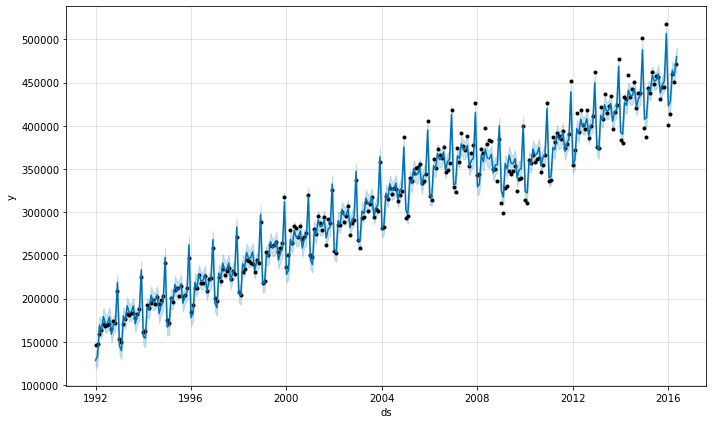

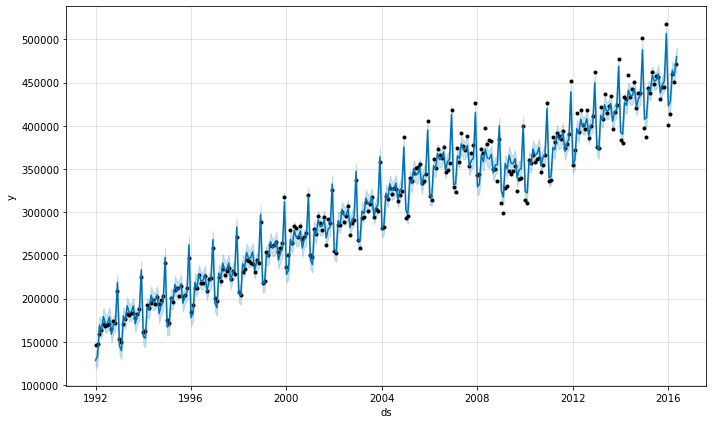

In [15]:
m.plot(forecast)

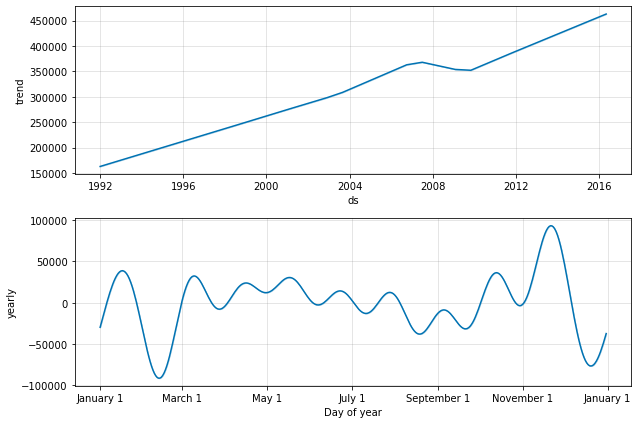

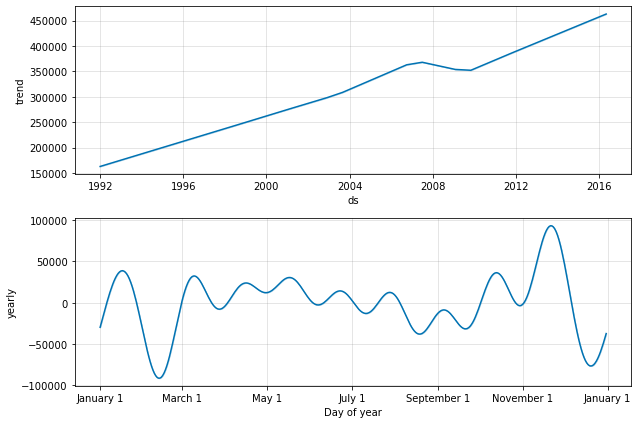

In [16]:
m.plot_components(forecast)

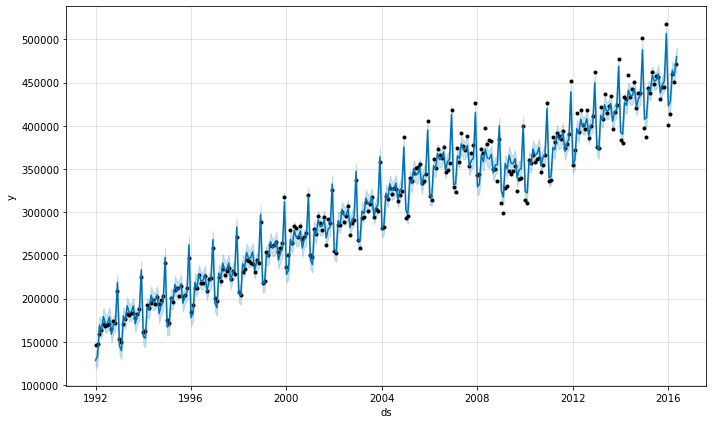

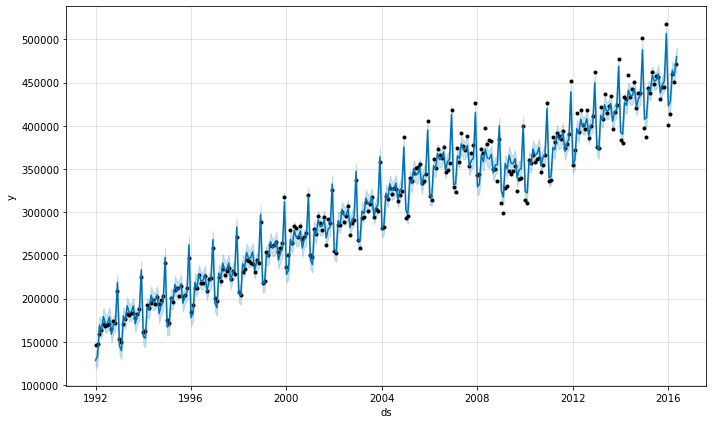

In [17]:
m.plot(forecast)

In [21]:
df=pd.read_csv("../dataset/example_retail_sales.csv")
df['cap']=475000

In [22]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods=5)
future['cap']=475000

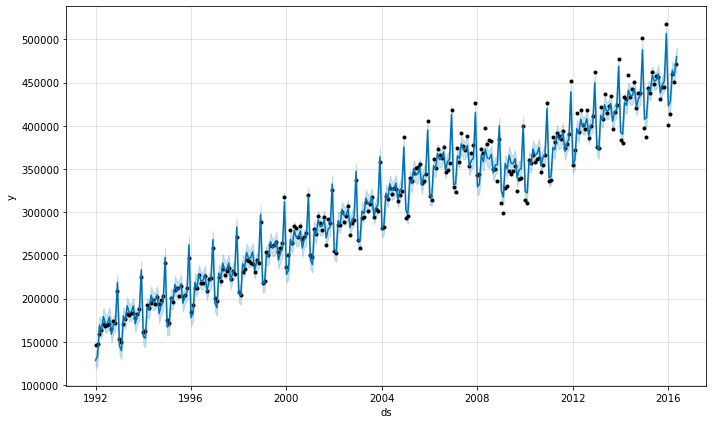

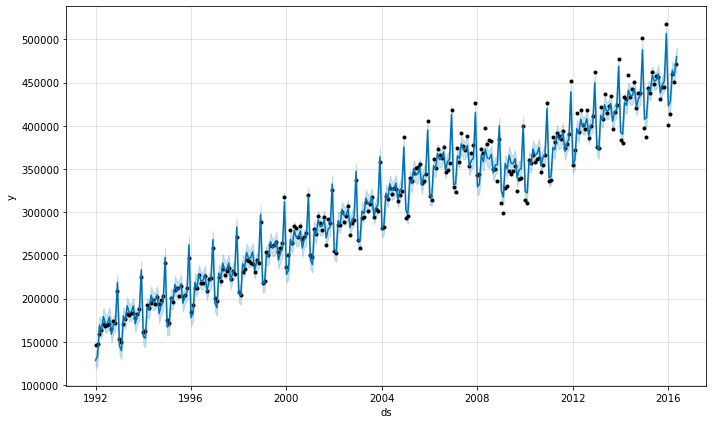

In [24]:
m.plot(forecast)